In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
# 参数
batch_size=128
n_classes=10
n_epoch=100

In [4]:
# 加载MNIST数据集
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
y_train=np_utils.to_categorical(y_train,num_classes=n_classes)
y_test=np_utils.to_categorical(y_test,num_classes=n_classes)

In [9]:
# 多层感知机模型
model=Sequential()
model.add(Dense(input_dim=784,units=625,kernel_initializer='normal',activation='sigmoid'))
model.add(Dense(input_dim=625,units=625,kernel_initializer='normal',activation='sigmoid'))
model.add(Dense(input_dim=625,units=10,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer=SGD(lr=0.05),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 625)               490625    
_________________________________________________________________
dense_14 (Dense)             (None, 625)               391250    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                6260      
Total params: 888,135
Trainable params: 888,135
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=n_epoch,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 70us/step - loss: 2.0403 - acc: 0.3579 - val_loss: 1.6295 - val_acc: 0.5036
Epoch 2/100
48000/48000 [==============================] - 1s 30us/step - loss: 1.1684 - acc: 0.7253 - val_loss: 0.8170 - val_acc: 0.7929
Epoch 3/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.7038 - acc: 0.8253 - val_loss: 0.5653 - val_acc: 0.8578
Epoch 4/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.5423 - acc: 0.8566 - val_loss: 0.4794 - val_acc: 0.8686
Epoch 5/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.4684 - acc: 0.8734 - val_loss: 0.4178 - val_acc: 0.8869
Epoch 6/100
48000/48000 [==============================] - 1s 27us/step - loss: 0.4245 - acc: 0.8820 - val_loss: 0.3828 - val_acc: 0.8954
Epoch 7/100
48000/48000 [==============================] - 1s 27us/step - loss: 0.3971 - acc: 0.8895 - val_loss: 0.3585 - 

48000/48000 [==============================] - 1s 28us/step - loss: 0.2066 - acc: 0.9408 - val_loss: 0.2067 - val_acc: 0.9432
Epoch 60/100
48000/48000 [==============================] - 1s 28us/step - loss: 0.2043 - acc: 0.9414 - val_loss: 0.2049 - val_acc: 0.9443
Epoch 61/100
48000/48000 [==============================] - 1s 27us/step - loss: 0.2023 - acc: 0.9425 - val_loss: 0.2069 - val_acc: 0.9430
Epoch 62/100
48000/48000 [==============================] - 1s 27us/step - loss: 0.2002 - acc: 0.9427 - val_loss: 0.2036 - val_acc: 0.9444
Epoch 63/100
48000/48000 [==============================] - 1s 29us/step - loss: 0.1980 - acc: 0.9427 - val_loss: 0.2007 - val_acc: 0.9450
Epoch 64/100
48000/48000 [==============================] - 1s 26us/step - loss: 0.1957 - acc: 0.9433 - val_loss: 0.2045 - val_acc: 0.9427
Epoch 65/100
48000/48000 [==============================] - 1s 26us/step - loss: 0.1935 - acc: 0.9443 - val_loss: 0.1964 - val_acc: 0.9469
Epoch 66/100
48000/48000 [==============

In [12]:
# 模型评估
evaluation=model.evaluate(X_test,y_test,verbose=1)
print("Summary:Loss over the test dataset:%.2f,Accuracy %.2f" % (evaluation[0],evaluation[1]))
# Summary:Loss over the test dataset:0.12,Accuracy 0.96

10000/10000 [==============================] - 0s 28us/step
Summary:Loss over the test dataset:0.15,Accuracy 0.96


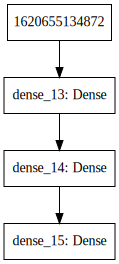

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))